In [1]:
import os
# Set the working directory to the directory of the script
os.chdir(r"G:/Mon Drive/Cat's_Software/TRAIL_v2024")

#  <img src="../data/logo_transparent.png" width="70"> 1. Loading Trails informations

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime

import pickle

from dep.coureur import Coureur
from dep.trails import distance_with_altitude, Trail


Pour récupérer le tracé .gpx  
https://tracedetrail.fr/  
TotoPlanet_1900

# Sélection du coureur

In [3]:
# coureur = 'Jim WALMSLEY'
Pugin = Coureur(nom= 'PUGIN',
                   prenom= 'Jean-Francois',
                   poids=65,
                   )
# coureur = 'Christian GAVIGNET'
# coureur = 'Jonas RUSSI'

# Modules

# Liste des trails réalisés

### Chargement des nouveaux tracés à partir du tableau de synthèse

In [4]:
coureur_choisi = Pugin

Lst_trails = pd.read_csv(f'./data/coureurs/ListeDesTrails_{coureur_choisi.prenom_nom}.csv',sep=';')
Lst_trails = Lst_trails[~Lst_trails['Trail'].isna()]
Lst_trails

,Trail,Date,Suivi,Heure_depart,Lien_URL,Fichier_parcours_gpx,Vit_plat_km/h,Vit_den+_m/h,Csv_file,Date_dt,Modele_prediction,Fit_intercept,Ralent_sec/km
0,2022TDS,2022-08-23,livetrail,00:00:00,https://livetrail.net/histo/utmb_2022/parcours...,tracedetrail_183308.gpx,15.38,1218.0,2022-08-23_TDS®_147.6km.csv,2022-08-23,points_passages,0.0,11.43
1,2022MaXiRace,2022-05-28,livetrail,02:50:00,https://livetrail.net/histo/maxirace_2022/,tracedetrail_168303.gpx,13.91,2326.0,2022-05-28_MaXi Race_86.6km.csv,2022-05-28,points_passages,0.0,7.84
2,2024UTMB,2023-09-01,A prédire,17:59:00,https://livetrail.net/histo/utmb_2023,utmb-2023.gpx,NaN,NaN,2023-09-01_UTMB®_173.5km.csv,2023-09-01,points_passages,NaN,NaN
3,2024LAVAREDO,2024-06-28,A prédire,23:00:00,https://livetrail.net/histo/lavaredo_2024,lavaredo-ultra-trail-2021-120k.gpx,NaN,NaN,2023-06-23_LAVAREDO 120K_122.2km.csv,2024-06-28,points_passages,NaN,NaN
4,2023WILD,2023-09-15,livetrail,05:01:00,https://livetrail.net/histo/wildstrubel_2023,tracedetrail_224737.gpx,14.65,1763.0,2023-09-15_Wild 110k_113.7km.csv,2023-09-15,points_passages,0.0,12.89
5,ALL,NaN,All,NaN,NaN,NaN,15.45,1446.0,NaN,NaN,points_passages,0.0,12.08
6,PROFIL,NaN,PROFIL,NaN,NaN,NaN,13.01,1713.0,NaN,NaN,points_passages,0.0,5.12


### Creation des objets trails

In [5]:
Trails_objects = [Trail(n.Trail,n.Date,n.Suivi,n.Heure_depart,n.Csv_file, n.Modele_prediction) for idx,n in Lst_trails.iterrows()]
print(f'{'i':3} {'T.nom_id':15} {'T.date':15} {'T.suivi':10} {'T.heure_depart':20} {'T.csv_file':36} {'T.modele_pred':10}')
for i,T in enumerate(Trails_objects):
    print(f'{i:3} {T.nom_id:15} {T.date:15} {T.suivi:10} {T.heure_depart:20} {T.csv_file:36} {T.modele_pred:10}')

i   T.nom_id        T.date          T.suivi    T.heure_depart       T.csv_file                           T.modele_pred
  0 2022TDS         2022-08-23      livetrail  00:00:00             2022-08-23_TDS®_147.6km.csv          points_passages
  1 2022MaXiRace    2022-05-28      livetrail  02:50:00             2022-05-28_MaXi Race_86.6km.csv      points_passages
  2 2024UTMB        2023-09-01      A prédire  17:59:00             2023-09-01_UTMB®_173.5km.csv         points_passages
  3 2024LAVAREDO    2024-06-28      A prédire  23:00:00             2023-06-23_LAVAREDO 120K_122.2km.csv points_passages
  4 2023WILD        2023-09-15      livetrail  05:01:00             2023-09-15_Wild 110k_113.7km.csv     points_passages
  5 ALL                         nan All                         nan                                  nan points_passages
  6 PROFIL                      nan PROFIL                      nan                                  nan points_passages


### Chargement des points de passage et des parcrours, Si pas de csv alors connexion au site par l'adresse URL

In [6]:
for i,T in enumerate(Trails_objects):
    print(i, T.nom_id)
    # Chargement des points de parcours
    if pd.notnull(Lst_trails.Fichier_parcours_gpx[i]):
        T.load_gpx(f'./data/gpx/{Lst_trails.Fichier_parcours_gpx[i]}')

    # Chargement des points de passage
    if T.suivi == 'livetrail' and pd.isnull(T.csv_file): # Si le fichier csv n'est pas encore disponible
        if datetime.datetime.today().strftime('%Y-%m-%d') < T.date:
            print('before')
            T.load_data_before_livetrail(Lst_trails.loc[Lst_trails['Trail']==T.nom_id,'Lien_URL'].values[0])
        else:
            T.load_data_livetrail(Lst_trails.loc[Lst_trails['Trail']==T.nom_id,'Lien_URL'].values[0])
            Lst_trails.loc[Lst_trails['Trail']==T.nom_id,'Csv_file']=T.csv_file
            print(i, T.nom_id,T.date,T.suivi,T.heure_depart)
    elif T.suivi == 'livetrack' and pd.isnull(T.csv_file):
        txt = T.load_data_before_livetrack(Lst_trails.loc[Lst_trails['Trail']==T.nom_id,'Lien_URL'].values[0])
        Lst_trails.loc[Lst_trails['Trail']==T.nom_id,'Csv_file']=T.csv_file
        print(i,T.nom_id,T.date,T.suivi,T.heure_depart)
    elif T.suivi == 'gpx' and pd.isnull(T.csv_file):
        print('Analyse à partir du fichier gpx')
    elif T.suivi == 'A prédire':
        print('Prédiction à venir')
    elif T.suivi == 'All' or T.suivi == 'PROFIL':
        print(T.nom_id,'Analyse combinée de trail')
    else:
        T.load_ppassage_csv()
    

0 2022TDS
5291 points ont été interpolés pour l altitude


G:\Mon Drive\Cat's_Software\TRAIL_v2024\dep\trails.py:131: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '11.388024185697075' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  self.df_parcours.loc[i,'Delta_Dist_m'] = distance_with_altitude(latitude1 = self.df_parcours.loc[i-1,'lat'],


gpx File loaded under 2022TDS.df_parcours
CSV File loaded under 2022TDS.df_ppassage
1 2022MaXiRace
2997 points ont été interpolés pour l altitude


G:\Mon Drive\Cat's_Software\TRAIL_v2024\dep\trails.py:131: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '20.951070467775125' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  self.df_parcours.loc[i,'Delta_Dist_m'] = distance_with_altitude(latitude1 = self.df_parcours.loc[i-1,'lat'],


gpx File loaded under 2022MaXiRace.df_parcours
CSV File loaded under 2022MaXiRace.df_ppassage
2 2024UTMB
0 points ont été interpolés pour l altitude


G:\Mon Drive\Cat's_Software\TRAIL_v2024\dep\trails.py:131: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '34.14136635122947' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  self.df_parcours.loc[i,'Delta_Dist_m'] = distance_with_altitude(latitude1 = self.df_parcours.loc[i-1,'lat'],


gpx File loaded under 2024UTMB.df_parcours
Prédiction à venir
3 2024LAVAREDO
0 points ont été interpolés pour l altitude


G:\Mon Drive\Cat's_Software\TRAIL_v2024\dep\trails.py:131: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '12.799208787680914' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  self.df_parcours.loc[i,'Delta_Dist_m'] = distance_with_altitude(latitude1 = self.df_parcours.loc[i-1,'lat'],


gpx File loaded under 2024LAVAREDO.df_parcours
Prédiction à venir
4 2023WILD
3183 points ont été interpolés pour l altitude


G:\Mon Drive\Cat's_Software\TRAIL_v2024\dep\trails.py:131: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '36.44973304216318' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  self.df_parcours.loc[i,'Delta_Dist_m'] = distance_with_altitude(latitude1 = self.df_parcours.loc[i-1,'lat'],


gpx File loaded under 2023WILD.df_parcours
CSV File loaded under 2023WILD.df_ppassage
5 ALL
ALL Analyse combinée de trail
6 PROFIL
PROFIL Analyse combinée de trail


N'oubliez pas de mettre dans le fichier coureur et de remplacer les virugules par des points virugules dans les anciens fichiers, le csv des points de passage récement chargés.

In [7]:
Trails_objects[0].df_ppassage

,id,Point_passage,Altitude_m,Cumul_Dist_km,Delta_Dist_km,Cumul_D+_m,Delta_D+_m,lon,lat,Heure_Passage,Temps_course,Classement,Vitesse_km/h,H_reel_h,Delta_reel_h
0,0,Courmayeur,1229,0.0,0.0,0,0,6.97176,45.79288,Tue. 00:00,00:00:00,-,0.00,0.000000,0.000000
1,45,Checrouit - Maison Veille,1947,6.8,6.8,789,789,6.93114,45.79073,Tue. 00:54,00:54:14,28,7.47,0.903889,0.903889
2,46,Arête du Mont-Favre,2431,11.3,4.5,1383,594,6.89001,45.77228,Tue. 01:32,01:32:04,24,7.28,1.534444,0.630556
3,47,Lac Combal,1975,15.2,3.9,1423,40,6.85595,45.77058,Tue. 01:53,01:52:52,22,11.25,1.881111,0.346667
4,48,Col Chavannes,2591,19.9,4.7,2067,644,6.83501,45.74951,Tue. 02:36,02:35:56,17,6.45,2.598889,0.717778
5,50,Col du petit Saint Bernard,2188,35.5,15.6,2665,598,6.88566,45.68320,Tue. 04:12,04:12:14,18,9.76,4.203889,1.605000
6,52,Séez,913,47.1,11.6,2705,40,6.80020,45.62282,Tue. 05:12,05:11:49,15,11.68,5.196944,0.993056
7,53,Bourg Saint-Maurice - Entrée,858,50.8,3.7,2765,60,6.76524,45.61761,Tue. 05:29,05:29:01,15,12.70,5.483611,0.286667
8,54,Bourg Saint-Maurice - Sortie,858,50.8,0.0,2765,0,6.76524,45.61761,Tue. 05:36,05:35:48,15,0.00,5.596667,0.113056
9,56,Fort de la Platte,1972,55.6,4.8,3882,1117,6.74301,45.63778,Tue. 06:46,06:46:23,14,4.08,6.773056,1.176389


### Creation de la version avec Arret et Creation du trail All_trails, somme de tous les segments

In [9]:
ALL = Trail(nom_id='ALL', d='NA', s='All', hd='NA', csv='NA', mod='NA')
ALL.trail = 'ALL'

print('------ df_ppassage ------')
durée_arret = 0
à_partir_de = 13

ALL.df_ppassage = pd.DataFrame()
for T in Trails_objects:
    if T.suivi == 'livetrail' or T.suivi == 'livetrack' or T.suivi == 'A prédire':
        print(T.nom_id,T.date,T.suivi,T.heure_depart,T.csv_file)
        T.load_ppassage_csv()
        T.remove_missing()
        # T.arret(durée_arret,à_partir_de)
        if pd.to_datetime(T.date)<=datetime.datetime.now() and T.suivi != 'A prédire':
            T.arret(durée_arret,à_partir_de)
            # print(T.nom_id,T.date,T.suivi,T.heure_depart,T.csv_file)
            T.remove_missing() # Elimine les lignes manquantes et recalcule le temps si il y a des trous
            # T.arret(durée_arret,à_partir_de)
            T.df_ppassage['Trail']=T.nom_id
            ALL.df_ppassage = pd.concat([ALL.df_ppassage,T.df_ppassage])
            print(T.nom_id,"DONE OK!")
        elif T.suivi == 'A prédire':
            T.arret(durée_arret,à_partir_de)
            T.remove_missing()
            T.df_ppassage['Trail']=T.nom_id
        else:
            print(T.nom_id,"Non ajouté à All")
        ALL.modele_pred = 'points_passages'
        ALL.df_ppassage=ALL.df_ppassage.reset_index(drop=True) # reset index in df

print('------ df_parcours ------')

ALL.df_parcours = pd.DataFrame()

for i,T in enumerate(Trails_objects):
    if T.suivi == 'gpx' and T.nom_id != 'ALL':
        ALL.modele_pred = 'gpx'
        ALL.df_parcours = pd.concat([ALL.df_parcours,T.df_parcours],ignore_index=True)

try: 
    if Trails_objects[-1].nom_id == 'ALL':
        Trails_objects[-1] = ALL
    elif Trails_objects[-2].nom_id == 'ALL':
        Trails_objects[-2] = ALL
    else:
        Trails_objects.append(ALL)
except:
    Trails_objects.append(ALL)
print('All ajouté à la liste des trails')



------ df_ppassage ------
2022TDS 2022-08-23 livetrail 00:00:00 2022-08-23_TDS®_147.6km.csv
CSV File loaded under 2022TDS.df_ppassage
2022TDS DONE OK!
2022MaXiRace 2022-05-28 livetrail 02:50:00 2022-05-28_MaXi Race_86.6km.csv
CSV File loaded under 2022MaXiRace.df_ppassage
2022MaXiRace DONE OK!
2024UTMB 2023-09-01 A prédire 17:59:00 2023-09-01_UTMB®_173.5km.csv
CSV File loaded under 2024UTMB.df_ppassage
2024LAVAREDO 2024-06-28 A prédire 23:00:00 2023-06-23_LAVAREDO 120K_122.2km.csv
CSV File loaded under 2024LAVAREDO.df_ppassage
2023WILD 2023-09-15 livetrail 05:01:00 2023-09-15_Wild 110k_113.7km.csv
CSV File loaded under 2023WILD.df_ppassage
2023WILD DONE OK!
------ df_parcours ------
All ajouté à la liste des trails


In [10]:
Trails_objects[-1].df_ppassage

AttributeError: 'Trail' object has no attribute 'df_ppassage'

Nombre de segments: 47
      pour une distance totale de: 347.90000000000003 km
      pour un dénivelé total   de: 21569 m  


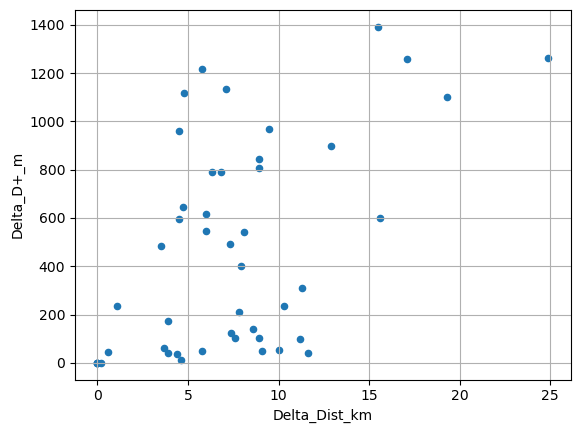

In [11]:
# Affiche tous les segments
print(f"""Nombre de segments: {len(ALL.df_ppassage)}
      pour une distance totale de: {ALL.df_ppassage['Delta_Dist_km'].sum()} km
      pour un dénivelé total   de: {ALL.df_ppassage['Delta_D+_m'].sum()} m  """)
ALL.df_ppassage.plot.scatter('Delta_Dist_km','Delta_D+_m')
plt.grid()

In [12]:
ALL.df_ppassage[['Trail','Point_passage','Heure_Passage','Temps_course','H_reel_h_init','H_reel_h','Delta_reel_h_init','Delta_reel_h']]

,Trail,Point_passage,Heure_Passage,Temps_course,H_reel_h_init,H_reel_h,Delta_reel_h_init,Delta_reel_h
0,2022TDS,Courmayeur,Tue. 00:00,00:00:00,0.000000,0.000000,0.000000,0.000000
1,2022TDS,Checrouit - Maison Veille,Tue. 00:54,00:54:14,0.903889,0.903889,0.903889,0.903889
2,2022TDS,Arête du Mont-Favre,Tue. 01:32,01:32:04,1.534444,1.534444,0.630556,0.630556
3,2022TDS,Lac Combal,Tue. 01:53,01:52:52,1.881111,1.881111,0.346667,0.346667
4,2022TDS,Col Chavannes,Tue. 02:36,02:35:56,2.598889,2.598889,0.717778,0.717778
5,2022TDS,Col du petit Saint Bernard,Tue. 04:12,04:12:14,4.203889,4.203889,1.605000,1.605000
6,2022TDS,Séez,Tue. 05:12,05:11:49,5.196944,5.196944,0.993056,0.993056
7,2022TDS,Bourg Saint-Maurice - Entrée,Tue. 05:29,05:29:01,5.483611,5.483611,0.286667,0.286667
8,2022TDS,Bourg Saint-Maurice - Sortie,Tue. 05:36,05:35:48,5.596667,5.596667,0.113056,0.113056
9,2022TDS,Fort de la Platte,Tue. 06:46,06:46:23,6.773056,6.773056,1.176389,1.176389


### Save Trails in pickle file

In [21]:
PIK = f"./data/coureurs/{coureur_choisi.prenom_nom}.dat"
with open(PIK, "wb") as f:
    for T in Trails_objects:
        pickle.dump(T, f)
    # pickle.dump(ALL, f)
print('Task completed')

Task completed


In [22]:
for i,T in enumerate(Trails_objects):
    print(f'{i:3} {T.nom_id:15} {T.date:15} {T.suivi:10} {T.heure_depart:10} {T.csv_file:25} {T.modele_pred:10}')

  0 2022TDS         2022-08-23      livetrail  00:00:00   2022-08-23_TDS®_147.6km.csv points_passages
  1 2022MaXiRace    2022-05-28      livetrail  02:50:00   2022-05-28_MaXi Race_86.6km.csv points_passages
  2 2024UTMB        2023-09-01      A prédire  17:59:00   2023-09-01_UTMB®_173.5km.csv points_passages
  3 2024LAVAREDO    2024-06-28      A prédire  23:00:00   2023-06-23_LAVAREDO 120K_122.2km.csv points_passages
  4 2023WILD        2023-09-15      livetrail  05:01:00   2023-09-15_Wild 110k_113.7km.csv points_passages
  5 ALL             NA              All        NA         NA                        points_passages
  6 PROFIL                      nan PROFIL            nan                       nan points_passages


In [19]:
Trails_objects[2].df_parcours   

,Altitude_m,Heure_Passage,hr,cad,lat,lon,Delta_Dist_m,Delta_reel_s,Dénivelé_m,Delta_D+_m,Delta_D-_m
0,1042.0,2024-05-01 19:37:05+00:00,NA,NA,45.92371,6.86875,0.000000,0,0,0,0
1,1037.0,2024-05-01 19:37:08+00:00,NA,NA,45.92359,6.86915,34.141366,3,-5,0,-5
2,1037.0,2024-05-01 19:37:11+00:00,NA,NA,45.92340,6.86968,46.218979,3,0,0,0
3,1038.0,2024-05-01 19:37:14+00:00,NA,NA,45.92316,6.86945,32.107848,3,1,1,0
4,1040.0,2024-05-01 19:37:17+00:00,NA,NA,45.92278,6.86908,51.104943,3,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...
5542,1034.0,2024-05-02 00:14:11+00:00,NA,NA,45.92314,6.86987,22.132089,3,-2,0,-2
5543,1033.0,2024-05-02 00:14:14+00:00,NA,NA,45.92332,6.86972,23.166028,3,-1,0,-1
5544,1033.0,2024-05-02 00:14:17+00:00,NA,NA,45.92350,6.86960,22.066384,3,0,0,0
5545,1037.0,2024-05-02 00:14:20+00:00,NA,NA,45.92359,6.86933,23.552405,3,4,4,0


In [16]:
Trails_objects[2].df_parcours['Delta_Dist_m'].sum()

168885.16021095339

In [36]:
Trails_objects[2].df_parcours['Delta_D+_m'].sum()

11603

ALtitude

In [15]:
import requests

def get_altitude(lat, lon):
    # Define the endpoint URL for the Open-Elevation API
    endpoint = "https://api.open-elevation.com/api/v1/lookup"
    
    # Set up the parameters for the API request
    params = {
        'locations': f'{lat},{lon}'
    }
    
    # Make the request to the Open-Elevation API
    response = requests.get(endpoint, params=params)
    
    # Check if the request was successful
    if response.status_code == 200:
        # Parse the JSON response
        results = response.json().get('results')
        if results:
            # Extract the elevation from the results
            altitude = results[0].get('elevation')
            return altitude
        else:
            raise ValueError("No elevation data found for the given coordinates.")
    else:
        # Handle the error
        response.raise_for_status()

# Example usage:
latitude = Trails_objects[2].df_parcours.loc[0,'lat']
longitude = Trails_objects[2].df_parcours.loc[0,'lon']

try:
    altitude = get_altitude(latitude, longitude)
    print(f"The altitude at latitude {latitude}, longitude {longitude} is {altitude} meters.")
except Exception as e:
    print(f"Error: {e}")


The altitude at latitude 45.92371, longitude 6.86875 is 1044.0 meters.
